In [126]:
import dowhy
import pandas as pd
import numpy as np


In [127]:
features = pd.read_csv("../resources/tabzilla/filtered/features.csv", index_col=0)

In [128]:
metrics = pd.read_csv("../resources/tabzilla/target/metrics__raw.csv", index_col=0)

In [129]:
datasets = features.merge(metrics, on="dataset_name").index

In [130]:
features = features.loc[datasets]
metrics = metrics.loc[datasets]

In [131]:
from sklearn.model_selection import KFold
from ms.metaresearch.data_split import split

outer_split = KFold(n_splits=5, shuffle=True, random_state=42)
data_splits = split(features, metrics, outer_split)

In [133]:
from ms.metaresearch.selectors.model_free import CorrelationInnerSelector

corr_inner_selector = CorrelationInnerSelector(
    corr_type="spearman",
    corr_threshold=0.9,
    vif_count_threshold=50,
    vif_value_threshold=None,
)

In [134]:
# experiment(
x_train = features.iloc[data_splits[0]["train"]]
x_test = features.iloc[data_splits[0]["test"]]
y_train = metrics.iloc[data_splits[0]["train"]]
y_test = metrics.iloc[data_splits[0]["test"]]
feature = "f__pymfe.general.nr_inst"
model_name = "LinearModel"
# )

In [135]:
x_train

,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.freq_class.max,f__pymfe.general.freq_class.mean,f__pymfe.general.freq_class.min,f__pymfe.general.freq_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.general.inst_to_attr,f__pymfe.general.nr_attr,...,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.statistical.t_mean.max,f__pymfe.statistical.t_mean.mean,f__pymfe.statistical.t_mean.min,f__pymfe.statistical.t_mean.sd,f__pymfe.statistical.t_mean.skewness,f__pymfe.statistical.var.kurtosis,f__pymfe.statistical.var.min,f__pymfe.statistical.var.skewness,f__pymfe.statistical.w_lambda
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Australian__146818,0.025362,1.333333,-2.750000,0.555072,0.500000,0.444928,0.077884,0.000000e+00,39.428571,14.0,...,-1.158670,139.718675,55.202460,1.723193,48.311854,0.630474,-1.415024,1.627868e+01,0.497348,0.674820
openml__GesturePhaseSegmentationProcessed__14969,0.004051,0.000000,-2.180579,0.298795,0.200000,0.101084,0.091933,-6.705847e-02,246.825000,32.0,...,3.840540,0.007441,0.000824,-0.000047,0.001943,2.280981,-0.022143,9.100091e-07,1.043820,0.668554
openml__JapaneseVowels__3510,0.001757,0.000000,-1.061513,0.162032,0.111111,0.078506,0.027600,6.703305e-01,569.200000,14.0,...,3.983511,17.827381,1.846290,-0.538388,5.119511,2.271923,7.178639,9.603790e-03,2.922296,0.001160
openml__MagicTelescope__3954,0.000657,0.000000,-2.750000,0.648370,0.500000,0.351630,0.209827,-1.666148e-16,1521.600000,10.0,...,2.927767,191.763499,29.270214,0.128719,58.628761,2.072411,-0.483390,1.221255e-02,0.969282,0.672392
openml__MiceProtein__146800,0.089120,0.000000,0.033808,0.138889,0.125000,0.097222,0.012890,-9.364469e-01,11.220779,77.0,...,4.959625,3.774048,0.657749,0.120482,0.738140,2.188471,35.255135,1.750954e-04,5.634052,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
openml__visualizing_livestock__3731,0.019231,NaN,-2.750000,0.807692,0.500000,0.192308,0.435143,3.705273e-17,52.000000,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openml__vowel__3022,0.015152,0.200000,NaN,0.090909,0.090909,0.090909,0.000000,NaN,66.000000,12.0,...,0.932925,1.888459,-0.118569,-3.212843,1.288352,-0.980482,1.271441,2.133541e-01,1.520120,0.039518
openml__wall-robot-navigation__9960,0.005499,0.000000,-2.329880,0.404142,0.250000,0.060117,0.170868,-8.608627e-02,181.866667,24.0,...,-1.198942,3.409339,1.747630,0.682213,0.826537,0.251920,-0.322115,6.445064e-01,0.280800,0.372426


In [136]:
x_test

,f__pymfe.general.attr_to_inst,f__pymfe.general.cat_to_num,f__pymfe.general.freq_class.kurtosis,f__pymfe.general.freq_class.max,f__pymfe.general.freq_class.mean,f__pymfe.general.freq_class.min,f__pymfe.general.freq_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.general.inst_to_attr,f__pymfe.general.nr_attr,...,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.statistical.t_mean.max,f__pymfe.statistical.t_mean.mean,f__pymfe.statistical.t_mean.min,f__pymfe.statistical.t_mean.sd,f__pymfe.statistical.t_mean.skewness,f__pymfe.statistical.var.kurtosis,f__pymfe.statistical.var.min,f__pymfe.statistical.var.skewness,f__pymfe.statistical.w_lambda
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Amazon_employee_access__34539,0.000343,NaN,-2.750000,0.942110,0.500000,0.057890,0.625238,1.703734e-17,2912.800000,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
openml__LED-display-domain-7digit__125921,0.017500,0.000000,-0.326213,0.115500,0.100000,0.074000,0.012065,-7.366039e-01,57.142857,7.0,...,-0.636686,1.000000,0.756667,0.326667,0.219489,-0.839836,-0.938760,1.492243e-01,-0.712343,5.310836e-03
openml__acute-inflammations__10089,0.062500,5.000000,-2.750000,0.583333,0.500000,0.416667,0.117851,3.643105e-16,16.000000,6.0,...,NaN,38.665862,38.665862,38.665862,NaN,NaN,NaN,3.314673e+00,NaN,4.558206e-01
openml__ada_agnostic__3896,0.013152,0.000000,-2.750000,0.751863,0.500000,0.248137,0.356188,6.922198e-17,76.033333,48.0,...,12.787048,626.859025,32.827580,0.000000,121.720697,3.679162,9.652990,0.000000e+00,3.203182,6.411981e-01
openml__arrhythmia__5,0.771573,0.354369,5.387881,0.542035,0.077564,0.004702,0.144133,2.548948e+00,1.296057,279.0,...,47.371118,367.396597,13.819199,-22.754006,35.866084,5.811216,18.944945,0.000000e+00,3.867693,6.008488e-09
openml__blood-transfusion-service-center__10101,0.006685,0.000000,-2.750000,0.762033,0.500000,0.237967,0.370571,7.426245e-17,149.600000,4.0,...,-1.688297,1027.287050,267.468312,4.109148,506.678493,0.748828,-1.687500,3.409827e+01,0.750000,8.701489e-01
openml__churn__167141,0.005000,0.250000,-2.750000,0.858600,0.500000,0.141400,0.507137,-2.134257e-17,200.000000,20.0,...,9.030767,2499.492208,223.941913,2.075000,611.015264,3.205469,9.363185,5.557954e-01,3.281228,9.273424e-01
openml__colic__27,0.074729,2.142857,-2.750000,0.630437,0.500000,0.369563,0.184466,1.835745e-16,13.381818,22.0,...,-1.521970,65.932711,28.656031,2.935656,22.769774,0.294404,-1.693798,4.111584e-01,0.581643,9.039500e-01
openml__cylinder-bands__14954,0.085648,1.055556,-2.750000,0.577778,0.500000,0.422222,0.109994,-7.739577e-17,11.675676,37.0,...,11.254748,36174.091154,2135.954630,0.000000,8505.175927,3.547499,11.324018,3.531330e-02,3.561711,8.638614e-01


In [137]:
from ms.metaresearch.data_preprocess import scale, fill_na
import seaborn as sns
from dowhy import CausalModel

# def experiment(
#         x_train, 
#         x_test, 
#         y_train, 
#         y_test,
#         feature,
#         model_name,
# ):
x_train_scaled = fill_na(x_train)
x_train_scaled, x_train_scaler = scale(x_train_scaled, "quantile")

x_test_scaled = fill_na(x_test)
x_test_scaled, x_test_scaler = scale(x_test_scaled, "quantile")

y_train_scaled = fill_na(y_train)
y_train_scaled, y_train_scaler = scale(y_train_scaled, "quantile")

y_test_scaled = fill_na(y_test)
y_test_scaled, y_test_scaler = scale(y_test_scaled, "quantile")

corr_res, corr_features = corr_inner_selector.compute_select(
    x_train_scaled,
    y_train_scaled,
)
x_train_corr = x_train_scaled.copy()
x_test_corr = x_test_scaled.copy()
x_train_scaled = x_train_scaled.loc[:, corr_features]
x_test_scaled = x_test_scaled.loc[:, corr_features]


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
n_quantiles (1000) is greater than the total number of samples (96). n_quantiles is set to n_samples.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
n_quantiles (1000) is greater than the total number of samples (25). n_quantiles is set to n_samples.

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
n_quantiles (1000) is greater than the total number of samples (96). n_quantiles is set to n_samples.

A value is trying to be set on a copy of a slice from a DataFrame

See t

In [138]:
# x_train_scaled["treatment"] = categorize_feature(
#     x_train_scaled[feature], 
#     bins=2
# ).values
x_train_scaled["outcome"] = y_train_scaled[model_name]
# x_test_scaled["treatment"] = categorize_feature(
#     x_test_scaled[feature],
#     bins=2
# ).values
x_test_scaled["outcome"] = y_test_scaled[model_name]

In [139]:
x_train_scaled

,f__pymfe.statistical.can_cor.min,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.model-based.var_importance.sd,f__pymfe.statistical.range.kurtosis,f__pymfe.statistical.sparsity.max,f__pymfe.model-based.nodes_repeated.sd,f__pymfe.model-based.tree_shape.sd,f__pymfe.statistical.gravity,f__pymfe.statistical.t_mean.skewness,f__pymfe.landmarking.one_nn.sd,...,f__pymfe.general.nr_bin,f__pymfe.statistical.skewness.min,f__pymfe.general.nr_inst,f__pymfe.landmarking.random_node.kurtosis,f__pymfe.model-based.leaves_per_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.landmarking.one_nn.skewness,f__pymfe.statistical.h_mean.min,f__pymfe.statistical.nr_norm,outcome
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Australian__146818,0.778947,0.336842,0.326316,0.210526,0.668421,0.757895,0.663158,0.726316,0.357895,0.715789,...,0.847368,0.894737,0.363158,0.221053,0.157895,0.368421,0.905263,0.894737,0.000000,0.589474
openml__GesturePhaseSegmentationProcessed__14969,0.084211,0.852632,0.073684,0.273684,0.084211,0.778947,0.031579,0.210526,0.884211,0.178947,...,0.000000,0.021053,0.884211,0.789474,0.326316,0.126316,0.936842,0.000000,0.000000,0.031579
openml__JapaneseVowels__3510,0.147368,0.863158,0.221053,0.852632,0.252632,0.768421,0.084211,0.557895,0.873684,0.147368,...,0.000000,0.305263,0.894737,0.684211,0.368421,0.915789,0.894737,0.000000,0.000000,0.652632
openml__MagicTelescope__3954,0.789474,0.831579,0.673684,0.336842,0.126316,0.873684,0.042105,0.663158,0.842105,0.052632,...,0.000000,0.115789,0.978947,0.694737,0.263158,0.168421,0.242105,0.000000,0.000000,0.421053
openml__MiceProtein__146800,0.905263,0.884211,0.157895,0.842105,0.136842,0.105263,0.357895,0.284211,0.863158,0.094737,...,0.000000,0.168421,0.484211,0.810526,0.336842,0.000000,0.084211,0.789474,0.978947,0.663158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
openml__visualizing_livestock__3731,0.500000,0.500000,0.500000,0.500000,0.378947,0.500000,0.500000,0.000000,0.500000,0.500000,...,0.000000,0.500000,0.115789,0.500000,0.500000,0.557895,0.500000,0.000000,0.000000,0.400000
openml__vowel__3022,0.000000,0.736842,0.621053,0.747368,0.705263,0.631579,0.642105,0.273684,0.000000,0.115789,...,0.563158,0.368421,0.452632,0.126316,0.105263,0.500000,0.157895,0.000000,0.957895,0.178947
openml__wall-robot-navigation__9960,0.336842,0.315789,0.705263,0.231579,0.147368,0.147368,0.915789,0.463158,0.221053,0.284211,...,0.000000,0.789474,0.800000,0.768421,0.936842,0.115789,0.821053,0.852632,0.000000,0.284211


In [140]:
x_test_scaled

,f__pymfe.statistical.can_cor.min,f__pymfe.statistical.t_mean.kurtosis,f__pymfe.model-based.var_importance.sd,f__pymfe.statistical.range.kurtosis,f__pymfe.statistical.sparsity.max,f__pymfe.model-based.nodes_repeated.sd,f__pymfe.model-based.tree_shape.sd,f__pymfe.statistical.gravity,f__pymfe.statistical.t_mean.skewness,f__pymfe.landmarking.one_nn.sd,...,f__pymfe.general.nr_bin,f__pymfe.statistical.skewness.min,f__pymfe.general.nr_inst,f__pymfe.landmarking.random_node.kurtosis,f__pymfe.model-based.leaves_per_class.sd,f__pymfe.general.freq_class.skewness,f__pymfe.landmarking.one_nn.skewness,f__pymfe.statistical.h_mean.min,f__pymfe.statistical.nr_norm,outcome
dataset_name,,,,,,,,,,,,,,,,,,,,,
openml__Amazon_employee_access__34539,0.500000,0.520833,0.500000,0.500000,0.208333,0.500000,0.500000,0.000000,0.500000,0.500000,...,0.000000,0.500000,1.000000,0.500000,0.500000,0.375000,0.500000,0.000000,0.000000,0.750000
openml__LED-display-domain-7digit__125921,0.208333,0.333333,0.250000,0.500000,0.708333,0.750000,0.166667,0.208333,0.083333,0.666667,...,0.916667,0.166667,0.375000,0.041667,0.166667,0.000000,0.291667,0.000000,0.000000,0.208333
openml__acute-inflammations__10089,0.833333,0.520833,0.500000,0.500000,0.625000,0.500000,1.000000,0.291667,0.500000,1.000000,...,0.875000,0.875000,0.000000,0.000000,1.000000,0.833333,0.000000,1.000000,0.000000,1.000000
openml__ada_agnostic__3896,0.625000,0.833333,0.333333,0.375000,1.000000,0.958333,0.083333,0.625000,0.833333,0.208333,...,0.958333,0.500000,0.750000,1.000000,0.250000,0.625000,0.666667,0.000000,0.875000,0.500000
openml__arrhythmia__5,0.791667,1.000000,0.041667,0.500000,1.000000,0.041667,0.541667,0.666667,1.000000,0.916667,...,1.000000,0.500000,0.291667,0.833333,0.416667,1.000000,0.833333,0.000000,1.000000,0.125000
openml__blood-transfusion-service-center__10101,0.250000,0.083333,0.875000,0.041667,0.291667,0.875000,0.250000,0.708333,0.416667,0.541667,...,0.000000,0.958333,0.583333,0.500000,0.875000,0.666667,0.375000,0.000000,0.000000,0.375000
openml__churn__167141,0.125000,0.625000,0.208333,0.625000,0.791667,0.833333,0.125000,0.500000,0.625000,0.250000,...,0.833333,0.791667,0.791667,0.500000,0.041667,0.250000,0.916667,0.000000,0.916667,0.583333
openml__colic__27,0.166667,0.125000,0.708333,0.083333,0.666667,0.708333,0.583333,0.416667,0.291667,0.708333,...,0.687500,0.333333,0.250000,0.916667,0.333333,0.750000,0.458333,0.958333,0.000000,0.541667
openml__cylinder-bands__14954,0.291667,0.750000,0.166667,0.750000,1.000000,0.416667,0.708333,0.750000,0.791667,0.625000,...,0.000000,0.083333,0.458333,0.958333,0.291667,0.125000,0.583333,0.000000,0.000000,0.166667


In [141]:
model = CausalModel(
    data=x_train_scaled,
    treatment=feature,
    outcome="outcome",
    common_causes=[
        i for i in x_train_scaled.columns if i not in [
            "outcome", feature
        ]
    ]
)

identified_estimand = model.identify_effect(
    proceed_when_unidentifiable=True, 
    method_name="maximal-adjustment"
)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                 ↪
───────────────────────────(E[outcome|f_node.sd,f_corrob.skewness,f_node.kurto ↪
d[f_inst__pymfe.general.nr]                                                    ↪

↪                                                                              ↪
↪ sis,f_mean.kurtosis,f_nn.skewness,f_nn.skewness,f_node.kurtosis,f_nn.min,f_m ↪
↪                                                                              ↪

↪                                                                              ↪
↪ ean.sd,f_attr,f_bin,f_branch.kurtosis,f_cor_attr,f_nn.sd,f_bayes.skewness,f_ ↪
↪                                                                              ↪

↪                                                                              ↪
↪ nn.sd,f_node.skewness,f_bayes.mean,f_per_inst,f_node.sd,f_depth.skewness,f_i

In [142]:
# T = x_train_scaled["treatment"]
# Y = x_train_scaled["outcome"]
# X = x_train_scaled.drop(["treatment", "outcome", feature], axis=1, inplace=False)

In [143]:
from dowhy.causal_estimators.linear_regression_estimator import LinearRegressionEstimator

estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression", 
    method_params={"init_params": {"second_stage_model": LinearRegressionEstimator}},
    test_significance=True,
)
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                 ↪
───────────────────────────(E[outcome|f_node.sd,f_corrob.skewness,f_node.kurto ↪
d[f_inst__pymfe.general.nr]                                                    ↪

↪                                                                              ↪
↪ sis,f_mean.kurtosis,f_nn.skewness,f_nn.skewness,f_node.kurtosis,f_nn.min,f_m ↪
↪                                                                              ↪

↪                                                                              ↪
↪ ean.sd,f_attr,f_bin,f_branch.kurtosis,f_cor_attr,f_nn.sd,f_bayes.skewness,f_ ↪
↪                                                                              ↪

↪                                                                              ↪
↪ nn.sd,f_node.skewness,f_baye

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [144]:
import pandas as pd
import networkx as nx
import dowhy.gcm as gcm
import matplotlib.pyplot as plt

causal_graph = nx.DiGraph()
causal_graph.add_edges_from([
    (feature, "outcome")
])

causal_gcm = gcm.InvertibleStructuralCausalModel(causal_graph)

gcm.auto.assign_causal_mechanisms(causal_gcm, x_train_scaled)

gcm.fit(causal_gcm, x_train_scaled)

Fitting causal mechanism of node outcome: 100%|██████████| 2/2 [00:00<00:00, 337.68it/s]        


In [147]:
values = [i/24 for i in range(1, 25, 1)]
values

In [151]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

results = {}

for value in values:
    ace = gcm.average_causal_effect(
        causal_gcm,
        target_node='outcome',
        interventions_alternative={feature: lambda x: value},
        interventions_reference={feature: lambda x: x},
        observed_data=x_test_scaled
    )

    results[value] = ace
    print(f"ATE for {feature} = {value}: {ace}")


df_results = pd.DataFrame(list(results.items()), columns=["quantile value", "Estimated ATE"])
print(df_results)

ATE for f__pymfe.general.nr_inst = 0.041666666666666664: -0.10092245297091312
ATE for f__pymfe.general.nr_inst = 0.08333333333333333: -0.11031782140874347
ATE for f__pymfe.general.nr_inst = 0.125: -0.14792371616236405
ATE for f__pymfe.general.nr_inst = 0.16666666666666666: -0.2090153388085939
ATE for f__pymfe.general.nr_inst = 0.20833333333333334: 0.08494598530283082
ATE for f__pymfe.general.nr_inst = 0.25: -0.09013250689050911
ATE for f__pymfe.general.nr_inst = 0.2916666666666667: -0.0491432580186027
ATE for f__pymfe.general.nr_inst = 0.3333333333333333: 0.13761903462215525
ATE for f__pymfe.general.nr_inst = 0.375: 0.10522570171160883
ATE for f__pymfe.general.nr_inst = 0.4166666666666667: -0.03332591173183019
ATE for f__pymfe.general.nr_inst = 0.4583333333333333: 0.06405803322195358
ATE for f__pymfe.general.nr_inst = 0.5: 0.15466241700240135
ATE for f__pymfe.general.nr_inst = 0.5416666666666666: 0.1271594205772159
ATE for f__pymfe.general.nr_inst = 0.5833333333333334: -0.0158015169944

<Axes: title={'center': 'f__pymfe.general.nr_inst, LinearModel'}, xlabel='quantile value'>

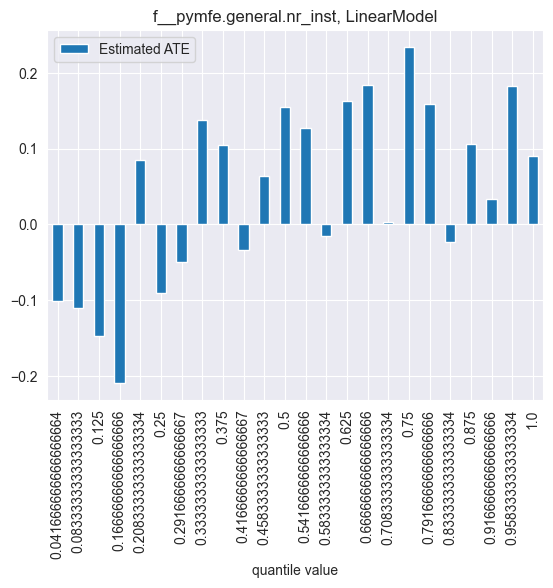

In [153]:
df_results.plot(x="quantile value", y="Estimated ATE", kind="bar", title=f"{feature}, {model_name}")


In [37]:
ace

In [64]:
observed_data = x_test_scaled.sample(1)

cf_high = gcm.counterfactual_samples(
    causal_gcm,
    {feature: lambda x: x * 1.5},
    observed_data=observed_data
)

cf_low = gcm.counterfactual_samples(
    causal_gcm,
    {feature: lambda x: x * 0.5},
    observed_data=observed_data
)

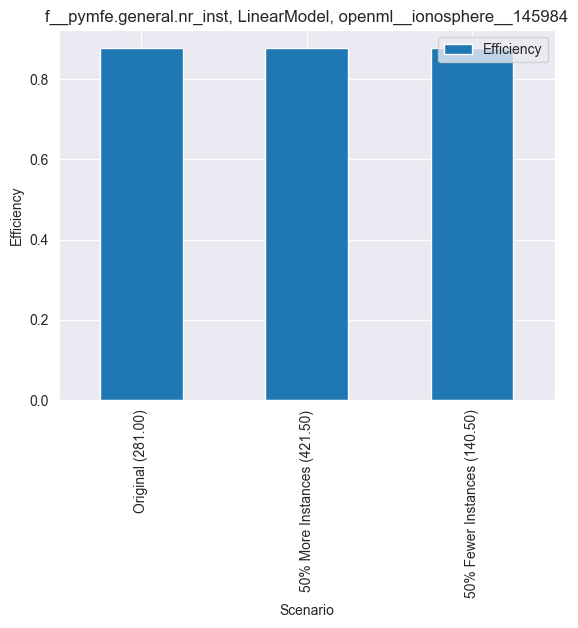

In [67]:
df_plot = pd.DataFrame({
    "Scenario": [
        f"Original ({observed_data[feature].values[0]:.2f})", 
        f"50% More Instances ({cf_high[feature].values[0]:.2f})", 
        f"50% Fewer Instances ({cf_low[feature].values[0]:.2f})"
    ],
    "Efficiency": [observed_data["outcome"].values[0], cf_high["outcome"].values[0], cf_low["outcome"].values[0]]
})

df_plot.plot(x="Scenario", y="Efficiency", kind="bar", title=f"{feature}, {model_name}, {observed_data.index[0]}")
plt.ylabel("Efficiency")
plt.show()